In [5]:
import pandas as pd
import os
import matplotlib
import seaborn as sns
import regex as re
import nltk
import numpy as np
import platform

## 1. Data

In [6]:
data_path = "../blueprints-text/data"

In [7]:
df = pd.read_csv(os.path.join(data_path, "un-general-debates/un-general-debates-blueprint.csv"))

In [8]:
df.head()

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


## 2. Summary Statistics for Columns

In [9]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0


In [12]:
df['length'] = df.text.str.len()

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [14]:
df[['country', 'speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


In [15]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [16]:
df['speaker'].fillna('unknown', inplace=True)

In [17]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker            0
position        3005
text               0
length             0
dtype: int64

In [18]:
df[df.speaker.str.contains('Bush')].speaker.value_counts()

George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: speaker, dtype: int64

## 3. Plotting Value Distributions

In [19]:
matplotlib.style.use('ggplot')

<AxesSubplot:>

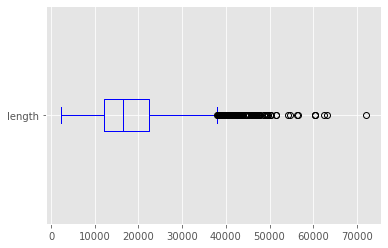

In [20]:
df.length.plot(kind='box', vert=False, color='blue')

<AxesSubplot:ylabel='Frequency'>

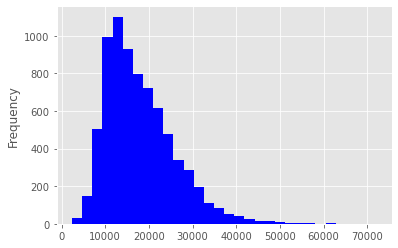

In [21]:
df.length.plot(kind='hist', bins=30, color="blue")

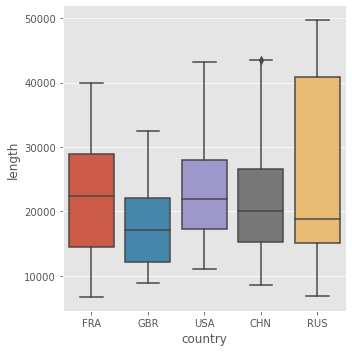

In [22]:
where = df.country.isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
sns.catplot(data=df[where], x='country', y='length', kind='box')

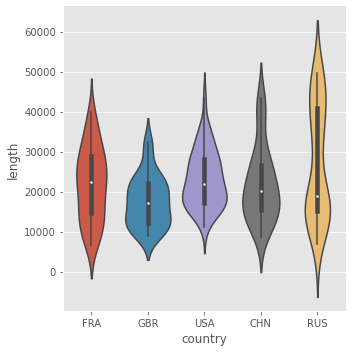

In [23]:
sns.catplot(data=df[where], x='country', y='length', kind='violin')

## 4. Visualizing Developments over Time

<AxesSubplot:title={'center':'Number of Countries'}, xlabel='year'>

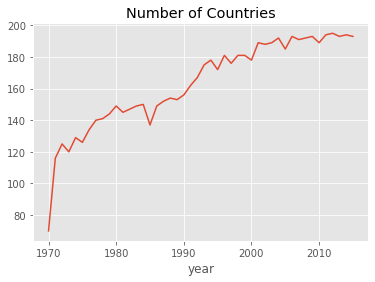

In [24]:
df.groupby('year') \
    .size() \
    .plot(title='Number of Countries')

<AxesSubplot:xlabel='year'>

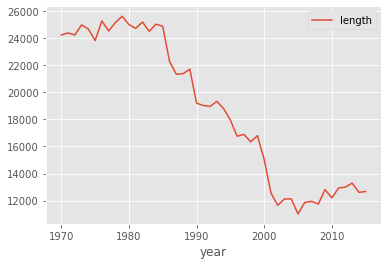

In [25]:
df \
    .groupby('year') \
    .agg({'length': 'mean'}) \
    .plot()

## 5. Building a simple Text preprocessing pipeline

### 5.1 Tokenization with RegEx

In [26]:
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [27]:
text = "Let's defeat SARS-CoV-2 together in 2020"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-CoV-2|together|in


### 5.2 Stop Words

In [28]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [29]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [30]:
include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'against'}

In [31]:
stopwords |= include_stopwords
stopwords -= exclude_stopwords

In [32]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'ain',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'dear',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'must',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'ove

In [33]:
len(stopwords)

183

### 5.3 Pipeline

In [34]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [35]:
df['tokens'] = df.text.apply(prepare, pipeline=pipeline)

In [36]:
df.head()

,session,year,country,country_name,speaker,position,text,length,tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419,"[may, first, convey, president, congratulation..."
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286,"[fortunate, coincidence, precisely, time, unit..."
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839,"[pleasure, extend, mr, president, warmest, con..."
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616,"[may, begin, expressing, ambassador, hambro, b..."
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911,"[doubt, us, coming, rostrum, wonders, usefulne..."


In [37]:
x = ['a', 'a', 'b']
np.unique(x)

array(['a', 'b'], dtype='<U1')

In [38]:
def unique_len(tokens):
    unique_tokens = np.unique(tokens)
    n_unique_tokens = len(unique_tokens)
    return(n_unique_tokens)
    

In [39]:
df['num_tokens'] = df.tokens.map(len)

In [40]:
df.tokens.map(unique_len)

0       1459
1       1159
2       1319
3       1086
4       1013
        ... 
7502     526
7503    1175
7504     649
7505     687
7506     605
Name: tokens, Length: 7507, dtype: int64

In [41]:
df.num_tokens

0       4125
1       2327
2       2545
3       2135
4       2025
        ... 
7502     880
7503    2089
7504    1145
7505    1184
7506     896
Name: num_tokens, Length: 7507, dtype: int64

## 6 Word Frequency Analysis

### 6.1 Counting Words

In [42]:
from collections import Counter

In [43]:
tokens = tokenize("She likes my cats and my cats like my sofa.")

In [44]:
tokens

['She', 'likes', 'my', 'cats', 'and', 'my', 'cats', 'like', 'my', 'sofa']

In [45]:
counter = Counter(tokens)

In [46]:
counter

Counter({'She': 1,
         'likes': 1,
         'my': 3,
         'cats': 2,
         'and': 1,
         'like': 1,
         'sofa': 1})

In [47]:
more_tokens = tokenize("She likes dogs and cats.")
counter.update(more_tokens)

In [48]:
counter

Counter({'She': 2,
         'likes': 2,
         'my': 3,
         'cats': 3,
         'and': 2,
         'like': 1,
         'sofa': 1,
         'dogs': 1})

In [49]:
counter = Counter()

In [50]:
counter

Counter()

In [51]:
# efficient
df.tokens.map(counter.update)

0       None
1       None
2       None
3       None
4       None
        ... 
7502    None
7503    None
7504    None
7505    None
7506    None
Name: tokens, Length: 7507, dtype: object

In [52]:
counter

Counter({'may': 14987,
         'first': 15965,
         'convey': 1607,
         'president': 18554,
         'congratulations': 3714,
         'albanian': 469,
         'delegation': 13458,
         'election': 7356,
         'presidency': 3700,
         'twenty-fifth': 555,
         'session': 29391,
         'general': 37138,
         'assembly': 40413,
         'taking': 5415,
         'work': 20495,
         'agenda': 8418,
         'twenty-': 308,
         'fifth': 974,
         'held': 9531,
         'eve': 380,
         'anniversary': 3977,
         'coming': 2045,
         'force': 10190,
         'charter': 16127,
         'united': 120763,
         'nations': 124508,
         'peace-loving': 1062,
         'member': 15440,
         'states': 59713,
         'wished': 285,
         'position': 6450,
         'present': 10769,
         'occasion': 2464,
         'picture': 742,
         'positive': 7684,
         'satisfactory': 890,
         'activity': 1621,
         'part'

In [53]:
counter.most_common(5)

[('nations', 124508),
 ('united', 120763),
 ('international', 117223),
 ('world', 89421),
 ('countries', 85734)]

In [54]:
def count_words(df, columns='tokens', preprocess=None, min_freq=2):
    # preprocess tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    # create counter and run through all data
    counter = Counter()
    df[columns].map(update)
    # transform counter into DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=["freq"])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)
    

In [55]:
freq_df = count_words(df)

In [56]:
freq_df

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
...,...
unrewarding,2
israel-egypt,2
non-jews,2


### 6.2 Frequency Diagram

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

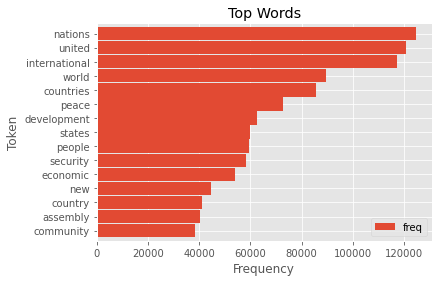

In [57]:
ax = freq_df.head(15).plot(kind='barh', width=0.95)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

### 6.3 Word Clouds

In [121]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [59]:
text = df.query("year==2015 and country=='USA'").text.values[0]
text

'Seventy years after the founding of the United Nations it is worth reflecting on what the members of this body, working together, have helped to achieve. Out of the ashes of the Second World War, having witnessed the unthinkable power of the atomic age, the United States has worked with many nations in the Assembly to prevent a third world war — by forging alliances with old adversaries; by supporting the steady emergence of strong democracies accountable to their people and not to any foreign Power; and by building an international system that imposes a cost on those who choose conflict over cooperation, an order that recognizes the dignity and equal worth of all people.\nThat has been the work of seven decades. That is the ideal that this body has, at its best, pursued. Of course, there have been too many times when, collectively, we have fallen short of those ideals. Over the seven decades, terrible conflicts have claimed untold victims. But we have pressed forward, slowly, steadil

In [60]:
wc = WordCloud(max_words=100, stopwords=stopwords)
wc

In [61]:
wc.generate(text)

(-0.5, 399.5, 199.5, -0.5)

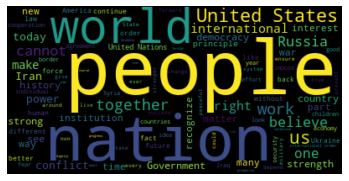

In [62]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [63]:
counter = freq_df.freq
counter

token
nations          124508
united           120763
international    117223
world             89421
countries         85734
                  ...  
unrewarding           2
israel-egypt          2
non-jews              2
shouf                 2
al-baydhah            2
Name: freq, Length: 40508, dtype: int64

In [64]:
wc = WordCloud(max_words=100, stopwords=stopwords)

In [65]:
counter.items()

In [66]:
counter = {token:freq for (token, freq) in counter.items()}
counter

{'nations': 124508,
 'united': 120763,
 'international': 117223,
 'world': 89421,
 'countries': 85734,
 'peace': 72625,
 'development': 62632,
 'states': 59713,
 'people': 59338,
 'security': 58425,
 'economic': 53833,
 'new': 44453,
 'country': 40878,
 'assembly': 40413,
 'community': 38294,
 'government': 37430,
 'general': 37138,
 'organization': 36434,
 'human': 36384,
 'efforts': 35184,
 'us': 34618,
 'rights': 33495,
 'political': 33353,
 'one': 31840,
 'africa': 31293,
 'support': 30224,
 'council': 29573,
 'session': 29391,
 'developing': 25977,
 'peoples': 25161,
 'time': 24870,
 'against': 24089,
 'order': 23581,
 'republic': 23369,
 'national': 23221,
 'problems': 23176,
 'many': 22849,
 'year': 22702,
 'situation': 22621,
 'state': 22579,
 'years': 22400,
 'south': 22246,
 'global': 21881,
 'conference': 21719,
 'region': 21470,
 'social': 21133,
 'like': 20566,
 'work': 20495,
 'made': 20328,
 'war': 20070,
 'great': 19505,
 'process': 19493,
 'hope': 19399,
 'nuclear': 19

In [67]:
wc.generate_from_frequencies(counter)

(-0.5, 399.5, 199.5, -0.5)

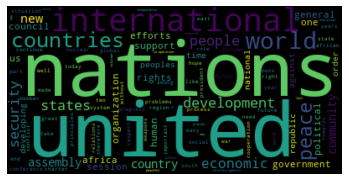

In [68]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [69]:
freq_2015_df = count_words(df[df.year == 2015])

(-0.5, 399.5, 199.5, -0.5)

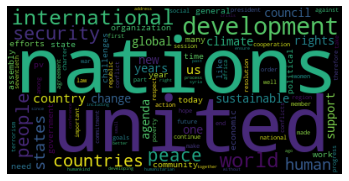

In [70]:
counter = freq_2015_df.freq
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate_from_frequencies(counter)
plt.imshow(wc)
plt.axis("off")

In [71]:
counter = Counter()
def update_counter(doc):
    counter.update(doc)

In [72]:
df[df.year==2015].tokens.map(update_counter)

7314    None
7315    None
7316    None
7317    None
7318    None
        ... 
7502    None
7503    None
7504    None
7505    None
7506    None
Name: tokens, Length: 193, dtype: object

In [73]:
df_freq_2 = pd.DataFrame.from_dict(counter, orient='index', columns=['n'])
df_freq_2.index.name = "token"
df_freq_2.sort_values(ascending=False, inplace=True, by='n')
df_freq_2

,n
token,
nations,2587
united,2571
development,1754
international,1727
world,1635
...,...
ill-fated,1
top-most,1
sailing,1


In [74]:
df_freq_2.head(50).index

Index(['nations', 'united', 'development', 'international', 'world',
       'security', 'peace', 'people', 'countries', 'states', 'human',
       'country', 'us', 'global', 'rights', 'new', 'sustainable', 'years',
       'one', 'climate', 'change', 'support', 'agenda', 'council', 'community',
       'efforts', 'assembly', 'economic', 'today', 'organization',
       'challenges', 'government', 'general', 'state', 'time', 'many', 'pv',
       'like', 'work', 'political', 'year', 'cooperation', 'need', 'against',
       'future', 'national', 'president', 'war', 'continue', 'goals'],
      dtype='object', name='token')

In [75]:
counter = {token:freq for (token, freq) in counter.items() if token not in df_freq_2.head(50).index}

In [76]:
wc = WordCloud(max_words=100)
wc.generate_from_frequencies(counter)

(-0.5, 399.5, 199.5, -0.5)

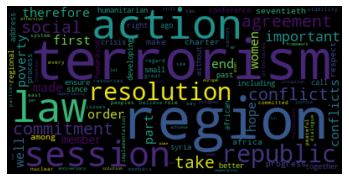

In [77]:
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')

In [78]:
freq_df.head(50)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


## 7. TF-IDF

In [108]:
def compute_idf(df, column='tokens', preprocess=None, min_df=2):
    
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        """
        'set' is important here: it is only checked whether a word is contained 
        in a given document not how many times (see TF-IDF definition and compare 
        with word count on page 16)
        """
        counter.update(set(tokens)) 
    
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create DataFrame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df) / idf_df['df']) 
    idf_df.index.name="token"
    return(idf_df)
    
    

In [110]:
idf_df = compute_idf(df)

/tmp/ipykernel_42708/3327950100.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(df) / idf_df['df'])


In [112]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

In [113]:
freq_df

,freq,tfidf
token,,
nations,124508,199.186284
united,120763,209.308632
international,117223,641.976226
world,89421,561.608982
countries,85734,2315.085986
...,...,...
unrewarding,2,16.460888
israel-egypt,2,16.460888
non-jews,2,16.460888


In [114]:
freq_1970 = count_words(df.query('year == 1970'))
freq_2015 = count_words(df.query('year == 2015'))

In [118]:
freq_1970['tfidf'] = freq_1970.freq * idf_df.idf
freq_2015['tfidf'] = freq_2015.freq * idf_df.idf

In [119]:
freq_1970

,freq,tfidf
token,,
nations,1997,3.194775
united,1996,3.459504
international,1251,6.851149
world,1093,6.864591
peace,970,24.468823
...,...,...
frangois,2,NaN
emphatic,2,10.371843
agonizing,2,9.033744


In [178]:
freq_1970

,freq,tfidf
token,,
nations,1997,3.194775
united,1996,3.459504
international,1251,6.851149
world,1093,6.864591
peace,970,24.468823
...,...,...
frangois,2,NaN
emphatic,2,10.371843
agonizing,2,9.033744


In [186]:
freq_1970_without_stopwords = {
    token:freq for (token, freq) in freq_1970.freq.to_dict().items() if token not in ['twenty-five', 'twenty-fifth']
}
freq_2015_without_stopwords = {
    token:freq for (token, freq) in freq_2015.freq.to_dict().items() if token not in ['seventieth']
}

tfidf_1970_without_stopwords = {
    token:tfidf for (token, tfidf) in freq_1970.tfidf.to_dict().items() if token not in ['twenty-five', 'twenty-fifth']
}
tfidf_2015_without_stopwords = {
    token:tfidf for (token, tfidf) in freq_2015.tfidf.to_dict().items() if token not in ['seventieth']
}

Text(0.5, 1.0, '2015 - TF-IDF')

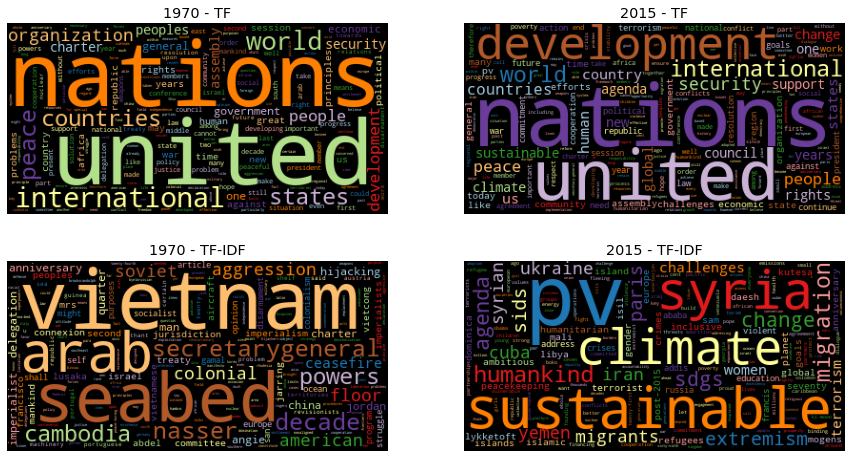

In [189]:
figure, axis = plt.subplots(2, 2, figsize=(15, 8))
wc = WordCloud(max_words=200, colormap="Paired")
wc.generate_from_frequencies(freq_1970_without_stopwords)
axis[0,0].imshow(wc)
axis[0,0].axis('off')

wc = WordCloud(max_words=200, colormap="Paired")
wc.generate_from_frequencies(freq_2015_without_stopwords)
axis[0,1].imshow(wc)
axis[0,1].axis('off')

wc = WordCloud(max_words=200, colormap="Paired")
wc.generate_from_frequencies(tfidf_1970_without_stopwords)
axis[1,0].imshow(wc)
axis[1,0].axis('off')

wc = WordCloud(max_words=200, colormap="Paired")
wc.generate_from_frequencies(tfidf_2015_without_stopwords)
axis[1,1].imshow(wc)
axis[1,1].axis('off')

axis[0,0].set_title('1970 - TF')
axis[0,1].set_title('2015 - TF')
axis[1,0].set_title('1970 - TF-IDF')
axis[1,1].set_title('2015 - TF-IDF')

In [165]:
freq_1970.freq.to_dict()

{'nations': 1997,
 'united': 1996,
 'international': 1251,
 'world': 1093,
 'peace': 970,
 'countries': 908,
 'states': 896,
 'organization': 762,
 'people': 649,
 'development': 643,
 'security': 594,
 'peoples': 567,
 'assembly': 552,
 'charter': 551,
 'government': 541,
 'one': 527,
 'general': 525,
 'economic': 448,
 'us': 401,
 'years': 392,
 'great': 369,
 'time': 365,
 'war': 360,
 'new': 353,
 'country': 348,
 'rights': 335,
 'problems': 331,
 'africa': 331,
 'against': 329,
 'human': 321,
 'may': 317,
 'republic': 316,
 'principles': 312,
 'political': 307,
 'session': 304,
 'developing': 299,
 'first': 296,
 'progress': 293,
 'arab': 293,
 'many': 290,
 'national': 280,
 'powers': 278,
 'hope': 269,
 'council': 268,
 'delegation': 265,
 'president': 264,
 'made': 260,
 'problem': 254,
 'social': 253,
 'two': 248,
 'among': 246,
 'efforts': 244,
 'law': 243,
 'without': 242,
 'decade': 241,
 'south': 240,
 'like': 238,
 'still': 237,
 'conference': 234,
 'part': 233,
 'order':